# Image augmentation notebook

More examples [here](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)

In [ ]:
#@title Check runtime for nvidia graphics card
!nvidia-smi -L

In [2]:
import glob
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from PIL import Image

In [3]:
#@title NN parameters
IMG_SIZE = 224 #@param {type:"integer"}
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

In [4]:
#@title Load images data

def get_files_in_folder(path: str) -> list:
    return list(glob.glob(f'{path}/*.jpg'))

def read_image(image_path) -> list:
    target_size = (IMG_SIZE, IMG_SIZE)
    img = tf.keras.preprocessing.image.load_img(image_path, color_mode = "rgb", target_size=target_size)
    x = tf.keras.preprocessing.image.img_to_array(img)
    return x

# create dataset
image_paths = get_files_in_folder('dataset/test_imgs')
images = [read_image(x) for x in image_paths]

x_train = np.array(images).astype(np.uint8)

del images

print('Done')
print(f'Total images: {x_train.shape[0]}')

Done
Total images: 22


In [5]:
photos_x_augmented = np.empty(shape=(1, 224, 224, 3))

### Augment random flip (1 time)

Appended 22 images
Total augmented images count: 23


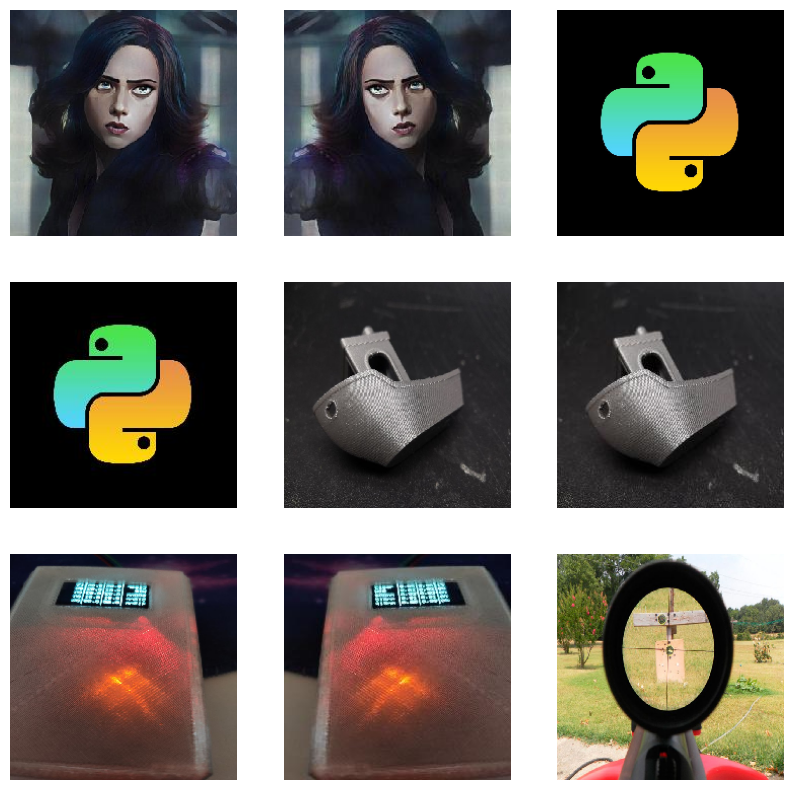

In [6]:
data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomFlip("horizontal")]
)

augmented_images = data_augmentation(x_train).numpy().astype(np.uint8)
photos_x_augmented = np.concatenate((photos_x_augmented, augmented_images), axis=0)
    
print(f'Appended {augmented_images.shape[0]} images')
print(f'Total augmented images count: {photos_x_augmented.shape[0]}')
    
# Show samples
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].astype(np.uint8))
    plt.axis("off")

plt.show()

### Augment random rotation (any times as you want)

In [ ]:
rotation_max_angle = 0.05

data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomRotation(rotation_max_angle)]
)

augmented_images = data_augmentation(x_train).numpy().astype(np.uint8)
photos_x_augmented = np.concatenate((photos_x_augmented, augmented_images), axis=0)

print(f'Appended {augmented_images.shape[0]} images')
print(f'Total augmented images count: {photos_x_augmented.shape[0]}')

# Show samples
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].astype(np.uint8))
    plt.axis("off")

plt.show()

### Augment random contrast (any times as you want)

In [ ]:
max_contrast_value = 0.1

data_augmentation = tf.keras.Sequential(
    [tf.keras.layers.RandomContrast(max_contrast_value)]
)

augmented_images = data_augmentation(x_train).numpy().astype(np.uint8)
photos_x_augmented = np.concatenate((photos_x_augmented, augmented_images), axis=0)

# Clip values (contrast)
photos_x_augmented = np.clip(photos_x_augmented, 0, 255)

print(f'Appended {augmented_images.shape[0]} images')
print(f'Total augmented images count: {photos_x_augmented.shape[0]}')

# Show samples
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i].astype(np.uint8))
    plt.axis("off")

plt.show()

In [ ]:
# Remove broken image
photos_x_augmented = photos_x_augmented[1:]

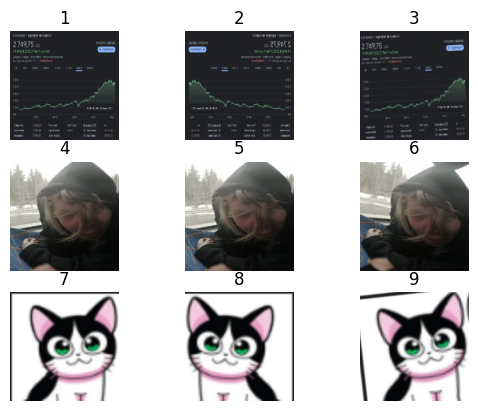

In [32]:
#@title compare images (augmented minimum 2 times)

for i in range(3):
    index_1 = np.random.choice(len(x_train))
    index_2 = index_1 + x_train.shape[0]
    
    images = [
        x_train[index_1],
        photos_x_augmented[index_1],
        photos_x_augmented[index_2]
    ]
        
    for j, img in enumerate(images):
        ax = plt.subplot(3, 3, (i * 3) + j + 1)
        plt.title((i * 3) + j + 1)
        plt.imshow(img.astype(np.uint8))
        plt.axis("off")
    
plt.show()

### Save augmented images to disk

In [12]:
for index, img in enumerate(photos_x_augmented):
    im = Image.fromarray(img.astype(np.uint8))
    
    file_name = image_paths[index % x_train.shape[0]].replace('.jpg', f'_augmented_{index}.jpg')
    
    im.save(file_name)
    
print('Images are saved to disk')

Images are saved to disk
